# Import libraries

In [76]:
import pandas as pd

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt

In [79]:
import seaborn as sns

In [80]:
import mllib

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import dataset

Import and read dataset:

In [82]:
trainingData = pd.read_csv('csv/cleaned/trainingData_clean.csv',index_col=0)

In [83]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [84]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

# Cross validation - REGRESSION

## td

In [85]:
td = trainingData.loc[list(X_train.index),:]

## LONGITUDE

### Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
y_train = td['LONGITUDE']

In [88]:
# cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = RandomForestRegressor()
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.99668445, 0.99509231, 0.99613632, 0.99665854, 0.99410663])

In [89]:
cross_validation = pd.DataFrame(columns=['target','model','avg_accuracy'])

In [90]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'avg_accuracy':avg_accuracy
                       })


cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [91]:
temp_df

,target,model,avg_accuracy
0,LONGITUDE,RFR,0.995736


### KNN Regression

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
y_train = td['LONGITUDE']

In [94]:
# cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsRegressor(n_neighbors=5,leaf_size=11)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()
result

array([0.99494472, 0.9956318 , 0.99440889, 0.99498632, 0.99285574])

In [95]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'avg_accuracy':avg_accuracy})


cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [96]:
temp_df

,target,model,avg_accuracy
0,LONGITUDE,KNNR,0.994565


### Decision tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
y_train = td['LONGITUDE']

In [99]:
# cross validation - too slow
k = 5
kf = KFold(n_splits=k, random_state=None)
model = DecisionTreeRegressor(max_depth=50, random_state=42)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.99455068, 0.99023039, 0.993671  , 0.99466728, 0.99106278])

In [100]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'avg_accuracy':avg_accuracy})

cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [101]:
temp_df

,target,model,avg_accuracy
0,LONGITUDE,DTR,0.992836


## LATITUDE

### Random Forest Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
y_train = td['LATITUDE']

In [104]:
# cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)
model = RandomForestRegressor()
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()
result

array([0.99357531, 0.99221169, 0.99080188, 0.99345547, 0.99128487])

In [105]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction

temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'avg_accuracy':avg_accuracy})


cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [106]:
temp_df

,target,model,avg_accuracy
0,LATITUDE,RFR,0.992266


### KNN Regression

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
y_train = td['LATITUDE']

In [109]:
# cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsRegressor(n_neighbors=5, leaf_size=11,weights='distance')
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.99300987, 0.99396421, 0.9895878 , 0.99223479, 0.98569096])

In [110]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'avg_accuracy':avg_accuracy})

cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [111]:
temp_df

,target,model,avg_accuracy
0,LATITUDE,KNNR,0.990898


### Support Vector Machines Regression

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
y_train = td['LATITUDE']

In [114]:
# cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)
model = DecisionTreeRegressor()
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()
result

array([0.98684437, 0.98548573, 0.98546798, 0.98601004, 0.98590097])

In [115]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'avg_accuracy':avg_accuracy})

cross_validation = cross_validation.append(temp_df,ignore_index=True)

In [116]:
temp_df

,target,model,avg_accuracy
0,LATITUDE,DTR,0.985942


## COMPARE models

In [117]:
cross_validation.style.format({
    "avg_accuracy":  "{:.2f}",
})
cross_validation

,target,model,avg_accuracy
0,LONGITUDE,RFR,0.995736
1,LONGITUDE,KNNR,0.994565
2,LONGITUDE,DTR,0.992836
3,LATITUDE,RFR,0.992266
4,LATITUDE,KNNR,0.990898
5,LATITUDE,DTR,0.985942


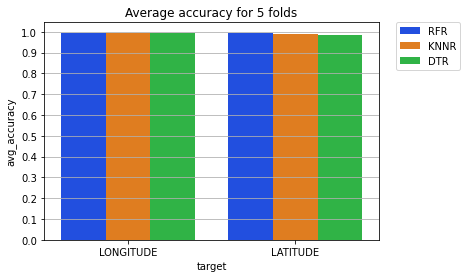

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.grid(axis='y')
sns.barplot(data = cross_validation, x = "target", y = "avg_accuracy", 
            hue = "model", palette = "bright")
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average accuracy for '+str(k)+' folds')
plt.show()

# Cross validation - categorical

## td

In [119]:
td = trainingData.loc[list(X_train.index),:]

## SELECT target

In [120]:
# 'building_floor':
# 'building_floor_spaceid': not used
# 'spaceid'
# 'longitude'
# 'building'
# 'floor'
target = 'building_floor'

## y - target

In [121]:
# select target and conditions

if target == 'building_floor':
    #BUILDING, FLOOR
    y_train = td['BUILDINGID']*10 + td['FLOOR'] 
#     y_test = vd['BUILDINGID']*10 + vd['FLOOR'] 
    
elif  target == 'building_floor_spaceid':
    # BUILDING, FLOOR, SPACEID
    y_train = td['BUILDINGID']*10000 + td['FLOOR']*1000 + td['SPACEID']
#     y_test = vd['BUILDINGID']*10000 + vd['FLOOR']*1000 + vd['SPACEID']
    
elif target == 'spaceid':
    # SPACEID
    y_train = td['SPACEID']
#     y_test = vd['SPACEID']
    
elif target == 'floor':
    # SPACEID
    y_train = td['FLOOR']
#     y_test = vd['FLOOR']
    
elif target == 'building':
    y_train = td['BUILDINGID']
#     y_test = vd['BUILDINGID']   

## Decision tree

In [122]:
# collect avg  accuracy of models
cross_validation_avg_acc = {}

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
# cross validation

k = 5

kf = KFold(n_splits=k, random_state=None)

model = DecisionTreeClassifier(max_depth=50)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.96206226, 0.95914397, 0.95298314, 0.95687419, 0.95687419])

In [125]:
cross_validation_avg_acc['DT'] = avg_accuracy
cross_validation_avg_acc['DT']

0.9575875486381322

## Knearest neighbors

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
# cross validation

k = 5

kf = KFold(n_splits=k, random_state=None)

model = KNeighborsClassifier(n_neighbors=3,weights='distance')
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.97892348, 0.97178988, 0.97470817, 0.97503243, 0.97081712])

In [128]:
cross_validation_avg_acc['KNN'] = avg_accuracy
cross_validation_avg_acc['KNN']

0.9742542153047988

## Logistic regression

Performs slow with big number of categories (for example building-floor)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
# cross validation

k = 5

kf = KFold(n_splits=k, random_state=None)

model = LogisticRegression(max_iter=10000)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.96595331, 0.96562905, 0.96660182, 0.97211414, 0.96044099])

In [131]:
cross_validation_avg_acc['LR'] = avg_accuracy
cross_validation_avg_acc['LR']

0.9661478599221789

## Random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
# cross validation

k = 5

kf = KFold(n_splits=k, random_state=None)

model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.99546044, 0.99546044, 0.99546044, 0.99546044, 0.99383917])

In [134]:
cross_validation_avg_acc['RF'] = avg_accuracy
cross_validation_avg_acc['RF']

0.995136186770428

## Support Vector Machine

Performs slow with big number of categories (for example building-floor)

In [135]:
from sklearn.svm import SVC

In [136]:
# cross validation

k = 5

kf = KFold(n_splits=k, random_state=None)

model = SVC(probability=True)
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
avg_accuracy = result.mean()

result

array([0.98249027, 0.97924773, 0.98151751, 0.98605707, 0.97405966])

In [137]:
cross_validation_avg_acc['SVM'] = avg_accuracy
cross_validation_avg_acc['SVM']

0.9806744487678338

## COMPARE accuracy of models

In [138]:
cross_validation_avg_acc

{'DT': 0.9575875486381322,
 'KNN': 0.9742542153047988,
 'LR': 0.9661478599221789,
 'RF': 0.995136186770428,
 'SVM': 0.9806744487678338}

In [139]:
def_cross_validation_avg_acc = pd.DataFrame(cross_validation_avg_acc.items(),columns=['model','avg_accuracy'])
def_cross_validation_avg_acc

,model,avg_accuracy
0,DT,0.957588
1,KNN,0.974254
2,LR,0.966148
3,RF,0.995136
4,SVM,0.980674


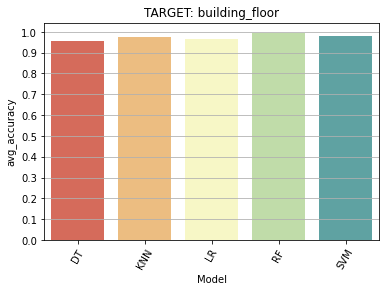

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.barplot(data = def_cross_validation_avg_acc, x = "model", y = "avg_accuracy", palette = "Spectral")
plt.title('TARGET: ' + target)
plt.xlabel("Model")
plt.ylabel("avg_accuracy")
plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 1.01, step=0.1))

plt.grid(axis='y')
plt.show()